In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mat73
from scipy.interpolate import griddata

from smoothen_surface import smoothen

%matplotlib notebook

# Interpolation

In [4]:
# Read data
data = mat73.loadmat("SKULL-MAPS/skull_mask_bm7_dx_0.25mm.mat")

xi = data["xi"]
yi = data["yi"]
zi = data["zi"]

skull_mask = data["skull_mask"]
brain_mask = data["brain_mask"]

# Get skull points
X, Y, Z = np.meshgrid(xi, yi, zi, indexing="ij")

x_skull = X[skull_mask]
y_skull = Y[skull_mask]
z_skull = Z[skull_mask]

# Create a dataframe
p_skull_volume = np.hstack((x_skull[:, np.newaxis],
                            y_skull[:, np.newaxis],
                            z_skull[:, np.newaxis]))
skull_volume_df = pd.DataFrame(p_skull_volume, columns=["X", "Y", "Z"])

# Get minimum and maximum at each (Y, Z) points
skull_surface_inner_df = skull_volume_df.groupby(["Y", "Z"]).max().reset_index()
skull_surface_outer_df = skull_volume_df.groupby(["Y", "Z"]).min().reset_index()

# Rearrange columns
skull_surface_inner_df = skull_surface_inner_df[["X", "Y", "Z"]]
skull_surface_outer_df = skull_surface_outer_df[["X", "Y", "Z"]]

# Sort based on Y and Z columns
skull_surface_inner_df = skull_surface_inner_df.sort_values(by=["Y", "Z"])
skull_surface_outer_df = skull_surface_outer_df.sort_values(by=["Y", "Z"])

# Convert to numpy array
skull_surface_inner = skull_surface_inner_df.to_numpy()
skull_surface_outer = skull_surface_outer_df.to_numpy()

# Reshape arrays
X_outer = skull_surface_outer[:, 0].reshape(yi.shape[0], zi.shape[0])
X_inner = skull_surface_inner[:, 0].reshape(yi.shape[0], zi.shape[0])
Y = skull_surface_outer[:, 1].reshape(yi.shape[0], zi.shape[0])
Z = skull_surface_outer[:, 2].reshape(yi.shape[0], zi.shape[0])

# Define interpolation points
Y_interp, Z_interp = np.mgrid[-35:35:71j, -35:35:71j]
Points = np.hstack((Y.reshape(-1, 1), Z.reshape(-1, 1)))

In [5]:
# Interpolate on outer surface to a larger mesh size
X_interp_outer_linear = griddata(Points, X_outer.flatten(), (Y_interp, Z_interp), method='linear')
X_interp_outer_nearest = griddata(Points, X_outer.flatten(), (Y_interp, Z_interp), method='nearest')
X_interp_outer_cubic = griddata(Points, X_outer.flatten(), (Y_interp, Z_interp), method='cubic')

In [6]:
# Interpolate on inner surface to a larger mesh size
X_interp_inner_linear = griddata(Points, X_inner.flatten(), (Y_interp, Z_interp), method='linear')
X_interp_inner_nearest = griddata(Points, X_inner.flatten(), (Y_interp, Z_interp), method='nearest')
X_interp_inner_cubic = griddata(Points, X_inner.flatten(), (Y_interp, Z_interp), method='cubic')

In [7]:
# Save mesh
skull_surface_outer_pp = np.hstack((X_interp_outer_linear.reshape(-1, 1),
                                    Y_interp.reshape(-1, 1),
                                    Z_interp.reshape(-1, 1)))

skull_surface_inner_pp = np.hstack((X_interp_inner_linear.reshape(-1, 1),
                                    Y_interp.reshape(-1, 1),
                                    Z_interp.reshape(-1, 1)))

<IPython.core.display.Javascript object>


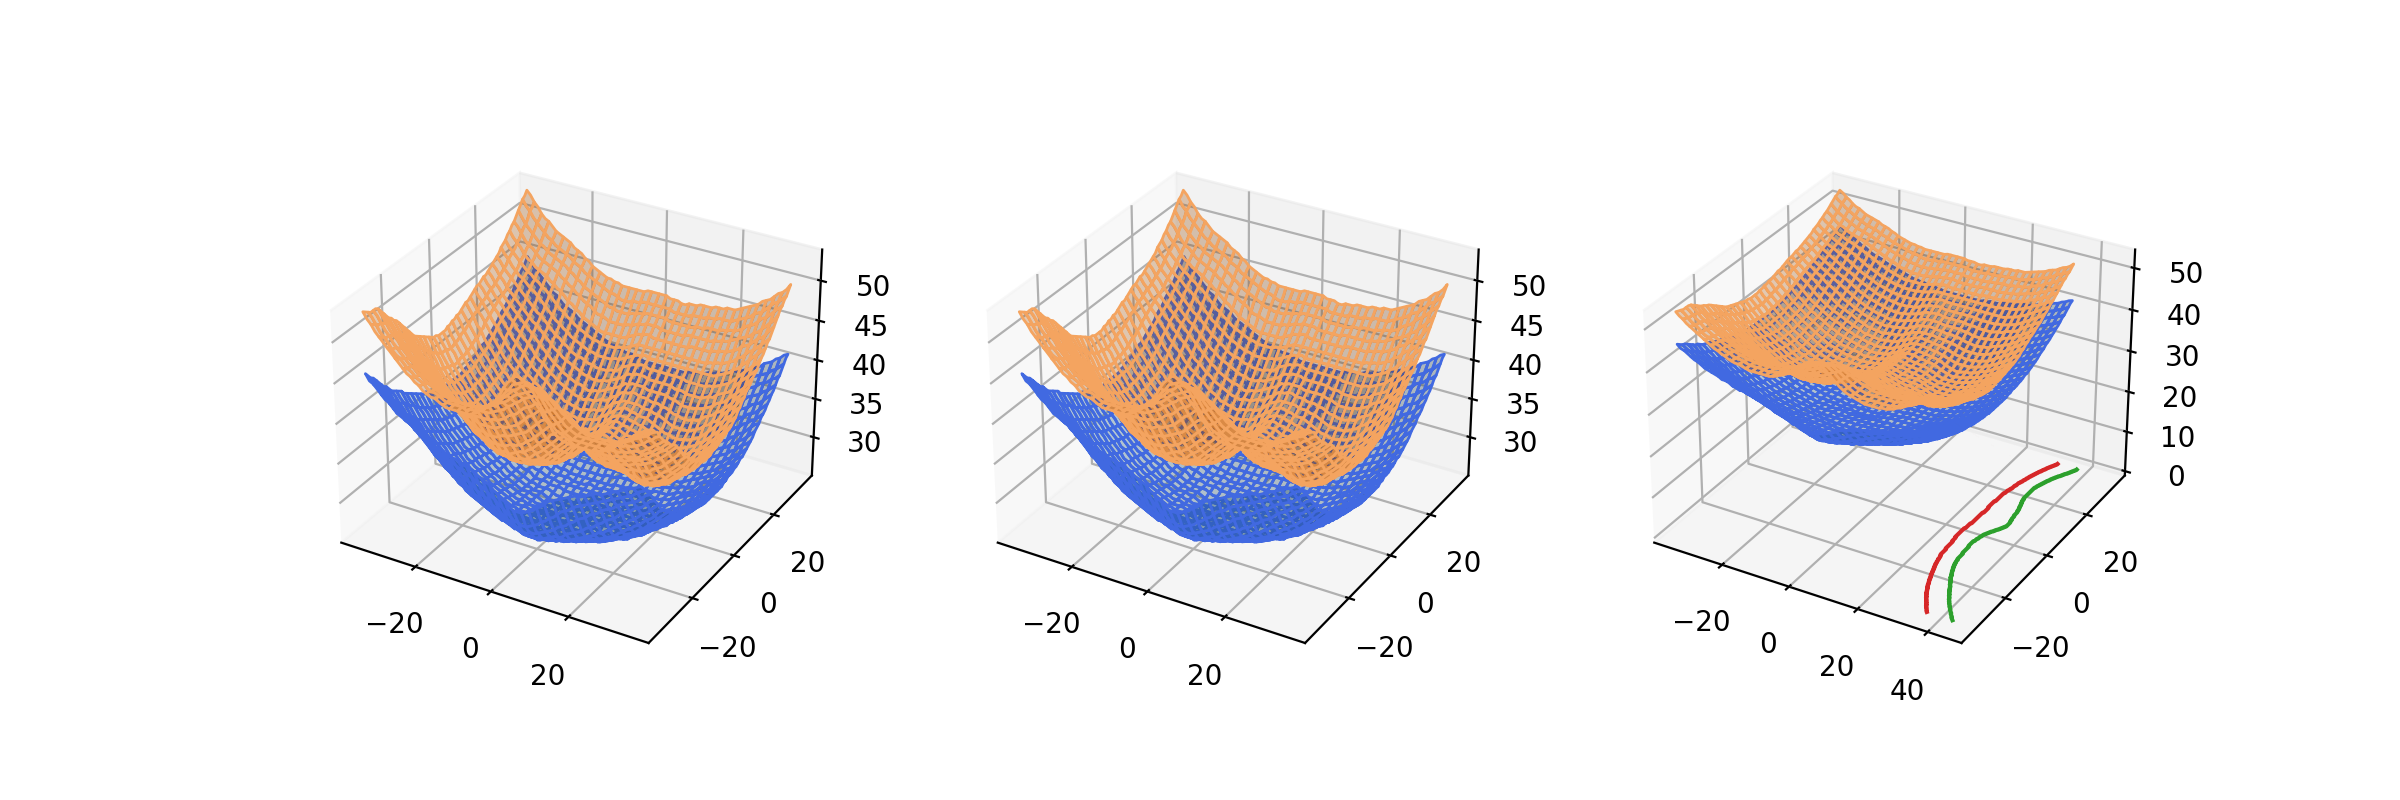

In [8]:
# Interpolation
fig = plt.figure(figsize=(12, 4))
fig.tight_layout()

ax1 = fig.add_subplot(131, projection="3d")
ax1.plot_surface(Y_interp, Z_interp, X_interp_outer_linear, edgecolor='royalblue', alpha=0.3)
ax1.plot_surface(Y_interp, Z_interp, X_interp_inner_linear, edgecolor='sandybrown', alpha=0.3)

ax2 = fig.add_subplot(132, projection="3d")
ax2.plot_surface(Y_interp, Z_interp, X_interp_outer_nearest, edgecolor='royalblue', alpha=0.3)
ax2.plot_surface(Y_interp, Z_interp, X_interp_inner_nearest, edgecolor='sandybrown', alpha=0.3)

ax3 = fig.add_subplot(133, projection="3d")
ax3.plot_surface(Y_interp, Z_interp, X_interp_outer_cubic, edgecolor='royalblue', alpha=0.3)
ax3.plot_surface(Y_interp, Z_interp, X_interp_inner_cubic, edgecolor='sandybrown', alpha=0.3)

<IPython.core.display.Javascript object>


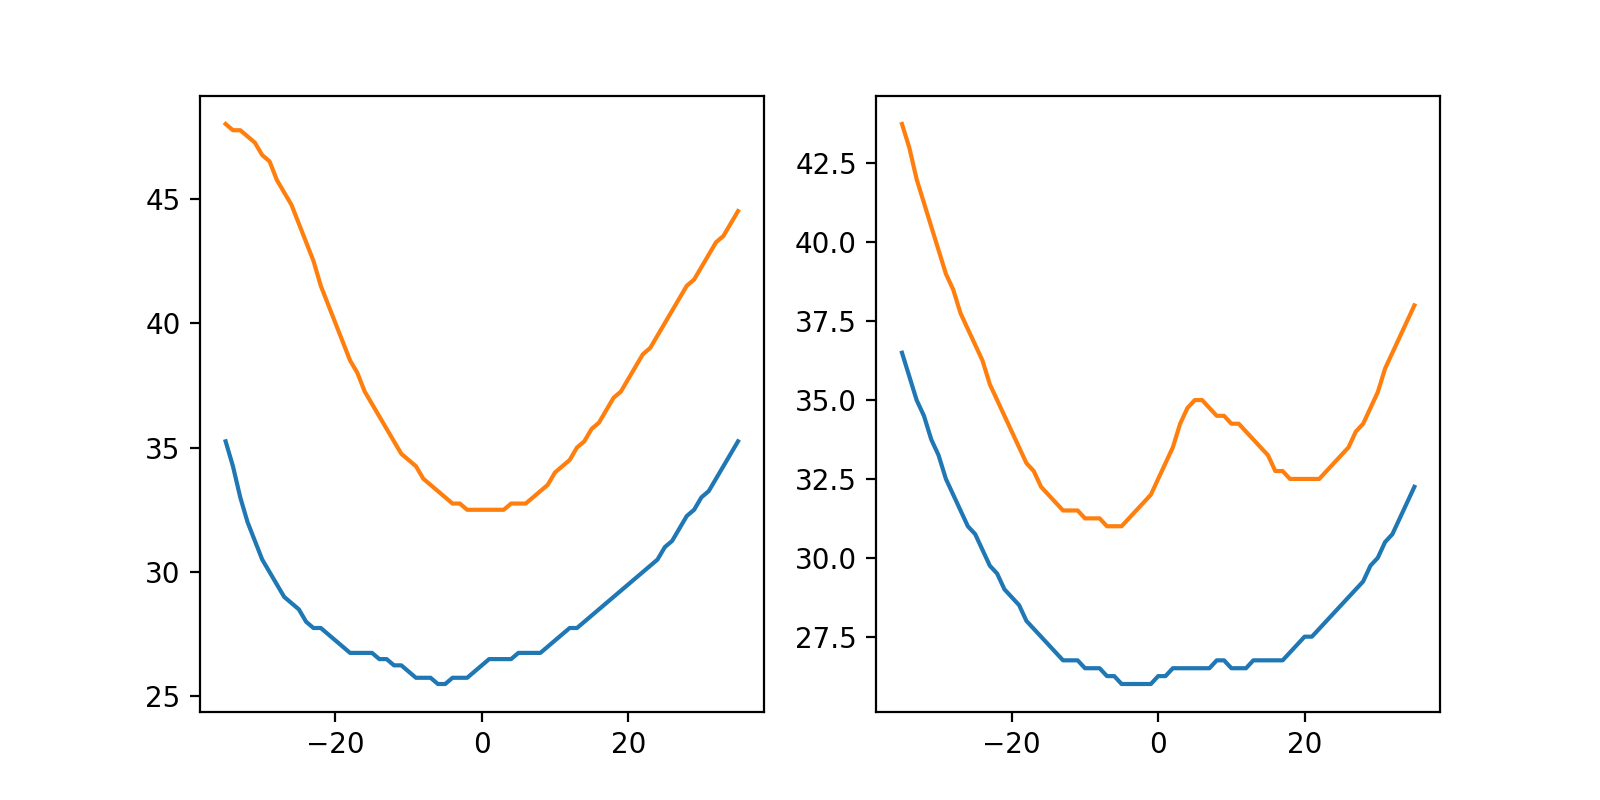

In [25]:
yi = Y_interp[:, 0]
zi = Z_interp[0, :]

z_profile_y_loc = 0.0
y_loc = np.where(np.isclose(yi, z_profile_y_loc))[0][0]

x_interp_outer_z = X_interp_outer_nearest[y_loc, :]
x_interp_inner_z = X_interp_inner_nearest[y_loc, :]

y_profile_z_loc = 0.0
z_loc = np.where(np.isclose(zi, y_profile_z_loc))[0][0]

x_interp_outer_y = X_interp_outer_nearest[:, z_loc]
x_interp_inner_y = X_interp_inner_nearest[:, z_loc]

fig = plt.figure(figsize=(8, 4))
fig.tight_layout()

ax1 = fig.add_subplot(121)
ax1.plot(zi, x_interp_outer_z)
ax1.plot(zi, x_interp_inner_z)

ax2 = fig.add_subplot(122)
ax2.plot(zi, x_interp_outer_y)
ax2.plot(zi, x_interp_inner_y)

# Smoothing

In [ ]:
# Read data
data = mat73.loadmat("SKULL-MAPS/skull_mask_bm7_dx_1mm.mat")

xi = data["xi"]
yi = data["yi"]
zi = data["zi"]

skull_mask = data["skull_mask"]
brain_mask = data["brain_mask"]

# Get skull points
X, Y, Z = np.meshgrid(xi, yi, zi, indexing="ij")

x_skull = X[skull_mask]
y_skull = Y[skull_mask]
z_skull = Z[skull_mask]

# Create a dataframe
p_skull_volume = np.hstack((x_skull[:, np.newaxis],
                            y_skull[:, np.newaxis],
                            z_skull[:, np.newaxis]))
skull_volume_df = pd.DataFrame(p_skull_volume, columns=["X", "Y", "Z"])

# Get minimum and maximum at each (Y, Z) points
skull_surface_inner_df = skull_volume_df.groupby(["Y", "Z"]).max().reset_index()
skull_surface_outer_df = skull_volume_df.groupby(["Y", "Z"]).min().reset_index()

# Rearrange columns
skull_surface_inner_df = skull_surface_inner_df[["X", "Y", "Z"]]
skull_surface_outer_df = skull_surface_outer_df[["X", "Y", "Z"]]

# Sort based on Y and Z columns
skull_surface_inner_df = skull_surface_inner_df.sort_values(by=["Y", "Z"])
skull_surface_outer_df = skull_surface_outer_df.sort_values(by=["Y", "Z"])

# Convert to numpy array
skull_surface_inner = skull_surface_inner_df.to_numpy()
skull_surface_outer = skull_surface_outer_df.to_numpy()

# Reshape arrays
X = skull_surface_outer[:, 0].reshape(yi.shape[0], zi.shape[0])
Y = skull_surface_outer[:, 1].reshape(yi.shape[0], zi.shape[0])
Z = skull_surface_outer[:, 2].reshape(yi.shape[0], zi.shape[0])

In [ ]:
# Before smoothing
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection="3d")

ax1.plot_surface(Y, Z, X, edgecolor='royalblue', alpha=0.3)
ax1.contour(Y, Z, X, zdir='z', offset=26, cmap='coolwarm')

# Apply smoothing
X_smooth = smoothen(X, 2)

ax2 = fig.add_subplot(122, projection="3d")

ax2.plot_surface(Y, Z, X_smooth, edgecolor='royalblue', alpha=0.3)
ax2.contour(Y, Z, X_smooth, zdir='z', offset=26, cmap='coolwarm')

In [ ]:
# Print maximum before and after smoothing
print(X.min(), X_smooth.min())

# Compare smoothing with interpolation

In [ ]:
print("Difference between smoothing and linear interpolation:", np.linalg.norm(X_smooth - X_interp_linear))
print("Difference between smoothing and linear interpolation:", np.linalg.norm(X_smooth - X_interp_nearest))
print("Difference between smoothing and linear interpolation:", np.linalg.norm(X_smooth - X_interp_cubic))